In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as px
%matplotlib inline

In [2]:
df =pd.read_excel('C:/Users/RadhikaMaheshwari/ - /Desktop/Test/2025/end to end ml/ml_credit_card_defaulter/data.xls')

In [3]:
# View the data
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
# Data description
# 1.	LIMIT_BAL: Credit Limit of the person.
# 2.	SEX: Gender of the person
# 3.	EDUCATION: Highest education level attained by the person
# 4.	MARRIAGE: Marital Status of the person
# 5.	AGE: Age of the person
# 6.	PAY_0 to PAY_6: History of past payment. We tracked the past monthly payment records (from April to September, 2005). If it is 0 then it means the person paid in time. If it negative the it means there was a delay and the amount of delay is represented by the numnber. Positive means the payment was made in time and the number next to it represents the number of times this happened.
# 7.	BILL_AMT1 to BILL_AMT6: Amount of bill statements.
# 8.	PAY_AMT1 to PAY_AMT6: Amount of previous payments. 


In [5]:
# Get the shape of data
df.shape

(30000, 24)

In [6]:
# Observation 1: There are 30000 rows and 24 columns

In [7]:
# Get the data type
df.dtypes

LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object

In [8]:
# Observation 2: All the data is in numerical form

In [9]:
# Describe data
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [10]:
# Observations 3: 
# There are some columns like Sex, Education, Marriage
# Minimum balance limit is 10000
# Maximum balance limit is 1000000
# Average balance limit is 140000
# We have data for people aged between 21 years and 79 years.
# Average age of person taking a credit card is 34 years. 

In [11]:
# Get more information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int64
 1   SEX                         30000 non-null  int64
 2   EDUCATION                   30000 non-null  int64
 3   MARRIAGE                    30000 non-null  int64
 4   AGE                         30000 non-null  int64
 5   PAY_0                       30000 non-null  int64
 6   PAY_2                       30000 non-null  int64
 7   PAY_3                       30000 non-null  int64
 8   PAY_4                       30000 non-null  int64
 9   PAY_5                       30000 non-null  int64
 10  PAY_6                       30000 non-null  int64
 11  BILL_AMT1                   30000 non-null  int64
 12  BILL_AMT2                   30000 non-null  int64
 13  BILL_AMT3                   30000 non-null  int64
 14  BILL_A

In [12]:
# Check for missing values
# Although from above cell we know that there are no missing values but just to double check
df.isnull().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [13]:
# Observations 4: There are no null or missing values in the dataset

In [14]:
# Get unique count of elements present
df.nunique()

LIMIT_BAL                        81
SEX                               2
EDUCATION                         7
MARRIAGE                          4
AGE                              56
PAY_0                            11
PAY_2                            11
PAY_3                            11
PAY_4                            11
PAY_5                            10
PAY_6                            10
BILL_AMT1                     22723
BILL_AMT2                     22346
BILL_AMT3                     22026
BILL_AMT4                     21548
BILL_AMT5                     21010
BILL_AMT6                     20604
PAY_AMT1                       7943
PAY_AMT2                       7899
PAY_AMT3                       7518
PAY_AMT4                       6937
PAY_AMT5                       6897
PAY_AMT6                       6939
default payment next month        2
dtype: int64

In [15]:
# Observations 5: 

# Categorical variables are - 

# There are two sex included in the analysis = Male and Female. 
# As per the problem statement 
#   - 1 Male
#   - 2 Female

# There are 7 different categories in education - 
#   - 0 No Formal Education
#   - 1 Primary Education
#   - 2 Secondary Education
#   - 3 Vocational/Technical Training
#   - 4 Associate's Degree
#   - 5 Bachelor's Degree
#   - 6 Graduate/Professional Degree

# There are 4 categories in Marriage - 
#   - 1 Married
#   - 2 Divorces
#   - 3 Single
#   - 4 Widow

# There are 2 categories in default payment next month
#   - 1 Yes
#   - 2 No

# Following are continuious variables
#   - LIMIT_BAL
#   - PAY_0
#   - PAY_2
#   - PAY_3
#   - PAY_4
#   - PAY_5
#   - PAY_6
#   - BILL_AMT1
#   - BILL_AMT2
#   - BILL_AMT3
#   - BILL_AMT4
#   - BILL_AMT5
#   - BILL_AMT6
#   - PAY_AMT1
#   - PAY_AMT2
#   - PAY_AMT3
#   - PAY_AMT4
#   - PAY_AMT5
#   - PAY_AMT6

In [16]:
# Check for duplicates
df.duplicated().sum()

35

In [17]:
# Observations 6:
# There are 35 rows duplicated across the dataset
# We can just remove these duplicates

In [18]:
df = df.drop_duplicates()
# All the duplicates have been removed

In [19]:
df.shape

(29965, 24)

In [20]:
# Univariate analysis
numerical_features = ["LIMIT_BAL", "PAY_0", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6", "BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6", "PAY_AMT1", "PAY_AMT2","PAY_AMT3","PAY_AMT4","PAY_AMT5","PAY_AMT6", "AGE"]
categorical_feature = ["SEX", "EDUCATION", "MARRIAGE"]
independent_feature = ["default payment next month"]

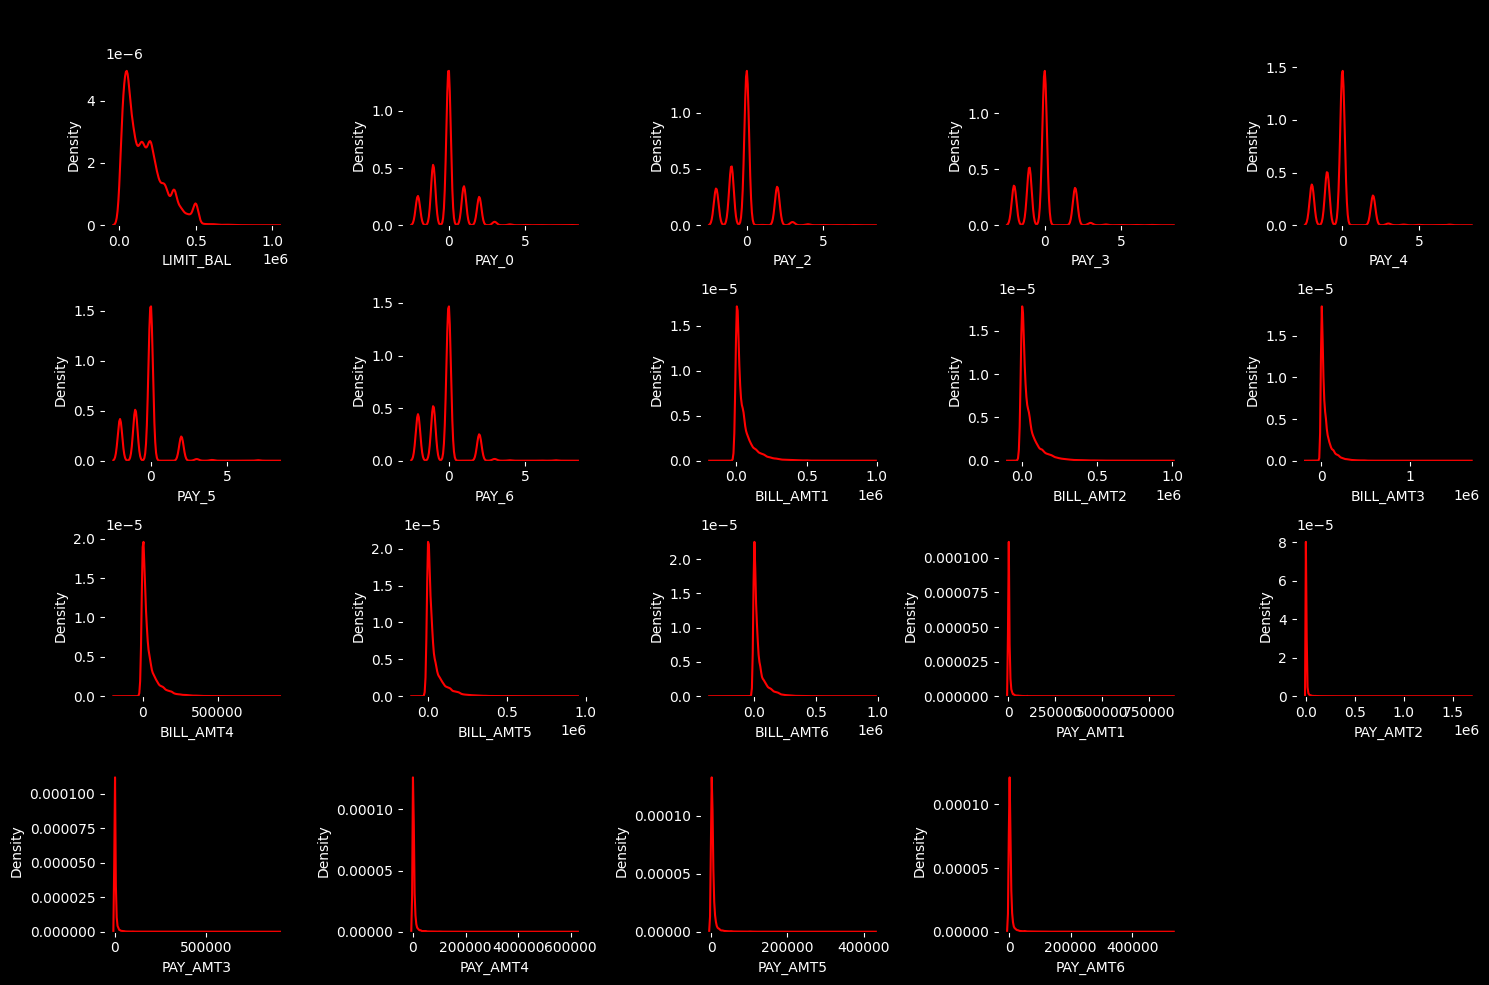

In [21]:
# Numerical features univariate analysis
plt.figure(figsize=(15, 10), facecolor='black')
plt.suptitle("Univariate Analysis of numerical feature", fontsize = 20, fontweight = 'bold')

for i in range(len(numerical_features) - 1):
    ax = plt.subplot(4, 5, i+1)
    sns.kdeplot(data = df[numerical_features[i]], color = 'red')
    plt.xlabel(numerical_features[i])
    plt.tight_layout()
    ax.set_facecolor('black')

    # Change the color of the labels and tick marks
    ax.xaxis.label.set_color('white')
    ax.yaxis.label.set_color('white')
    ax.tick_params(axis = 'x', colors = 'white')
    ax.tick_params(axis = 'y', colors = 'white')



In [22]:
# Observations 7:
# PAY_0 is the only distribution which is normally distributed. Rest all the distributions are right skewed. 

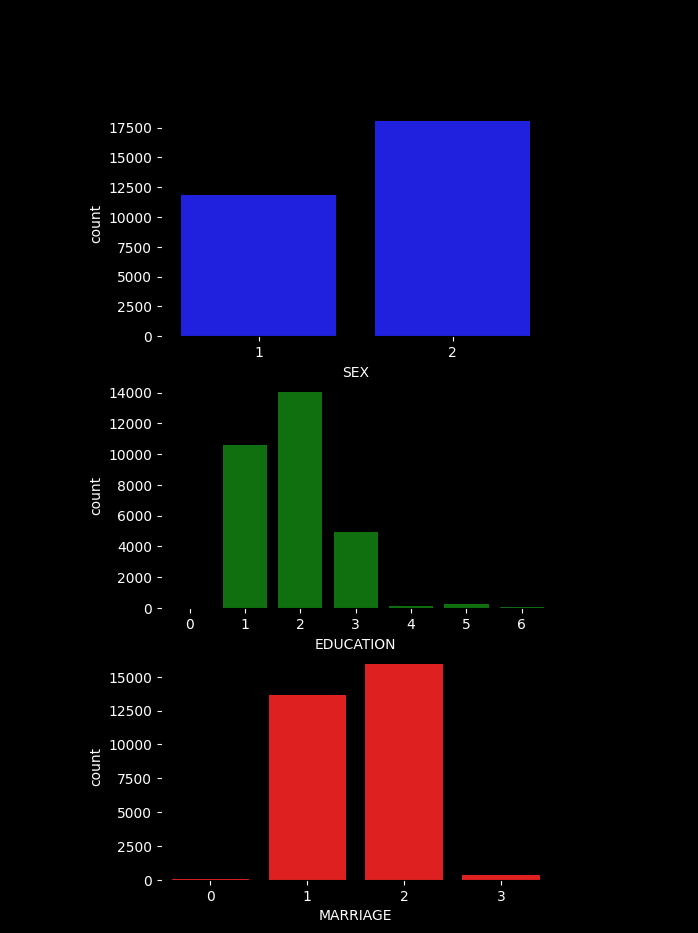

In [23]:
# Categorical features univariate analysis
plt.figure(figsize=(5, 10), facecolor = 'black')
plt.suptitle("Univariate analysis of categorical variables", fontsize = 20, fontweight= 'bold')
color = ['blue', 'green', 'red']

for i in range(len(categorical_feature)):
    ax = plt.subplot(3, 1, i+1)
    sns.countplot(data = df, x =categorical_feature[i], color = color[i])
    plt.xlabel(categorical_feature[i])
    ax.set_facecolor('black')

    # change the color of the labels and ticks to white
    ax.xaxis.label.set_color('white')
    ax.yaxis.label.set_color('white')
    ax.tick_params(axis = 'x', colors = 'white')
    ax.tick_params(axis = 'y', colors = 'white')

In [24]:
# Observations 8:


In [25]:
# Check for multicollinearity in numerical features
# Using Variance Inflation Factor

from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data):
    vif = pd.DataFrame()
    vif['features'] = data.columns
    vif['VIF_Value'] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    return vif

calculate_vif(df.loc[:, numerical_features])

,features,VIF_Value
0,LIMIT_BAL,3.841491
1,PAY_0,1.923562
2,PAY_2,3.205949
3,PAY_3,3.714524
4,PAY_4,4.425095
5,PAY_5,4.968077
6,PAY_6,3.450168
7,BILL_AMT1,20.799710
8,BILL_AMT2,38.209539
9,BILL_AMT3,31.776712


In [26]:
# Observations 9:
# Observing the VIF values of all the numerical fields, it appears that BILL_AMT1, BILL_AMT2, BILL_AMT3, BILL_AMT4, BILL_AMT5, BILL_AMT6 have multicollinearity. We can remove these features if needed. We will take this decision at a later stage

In [27]:
# Check multicollinearity incategorical features
calculate_vif(df[categorical_feature])

,features,VIF_Value
0,SEX,7.202534
1,EDUCATION,4.876740
2,MARRIAGE,5.930294


In [28]:
# Observations 10:
# Sex column seems to have multicollinearity. 

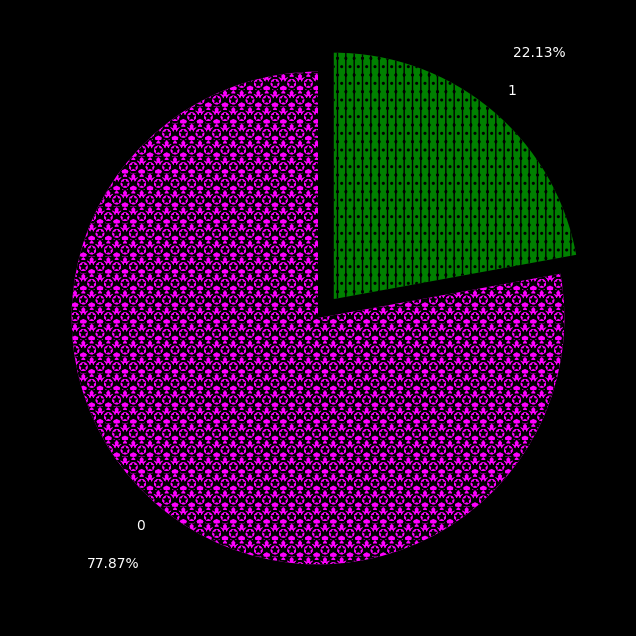

In [29]:
# Visualzing the target variable
credit_card_defaulter_percent = df['default payment next month'].value_counts(normalize=True)*100

labels = credit_card_defaulter_percent.index

fig, ax = plt.subplots(figsize=(15, 8), facecolor = 'black')
explode = (0,0.1)
ax.pie(credit_card_defaulter_percent, labels = labels, autopct='%1.2f%%', explode=explode, startangle=90, colors = ['magenta', 'green'], hatch = ['**O', ".||."], labeldistance=1.1, pctdistance=1.3, textprops={'color':'white'})
plt.show()


In [30]:
# Observations 10:
# From the above pie chart it is cleae that Target Variable is imbalanced. Imbalanced datasets are those datasets where the target column has an uneven distribution of observations. 

In [31]:
# Relationship between SEX and target variable
df.groupby('SEX')['default payment next month'].value_counts(normalize=True).to_frame() * 100

proportion
SEX default payment next month            
1   0                            75.837965
    1                            24.162035
2   0                            79.210657
    1                            20.789343

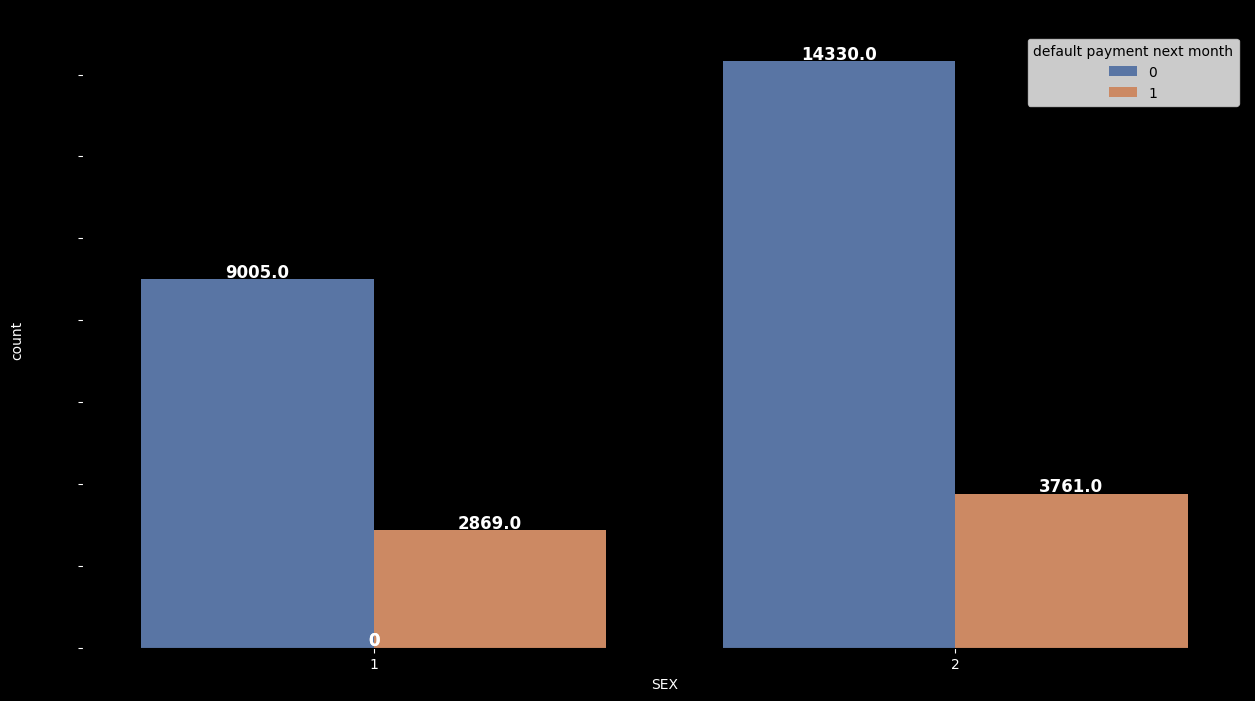

In [32]:
# Visualizing the above data
fig, ax = plt.subplots(figsize = (15, 8), facecolor = 'black')
plt.title("Relationship between sex and target variable")
sns.countplot(data = df, x = 'SEX', hue ='default payment next month', palette='deep')
ax.set_facecolor('black')
ax.tick_params(axis = 'x', colors = 'white')
ax.tick_params(axis = 'y', color = 'white')
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')

for p in ax.patches:
    ax.annotate(format(p.get_height()),
                (p.get_x() + p.get_width() /2., p.get_height()),
                ha = 'center', va='center',
                xytext = (0, 5),
                textcoords = 'offset points',
                fontsize = 12, color = 'white', weight = 'bold')

In [33]:
# Observations 11:
# Both genders have similar distribution, that is, in both cases the count of people failing to pay and making a credit card default is lower as compared to those who are defaulters.

In [34]:
# Relationship between education and target variable
df.groupby('EDUCATION')['default payment next month'].value_counts(normalize = True).to_frame()*100


proportion
EDUCATION default payment next month            
0         0                           100.000000
1         0                            80.763041
          1                            19.236959
2         0                            76.260789
          1                            23.739211
3         0                            74.832146
          1                            25.167854
4         0                            94.308943
          1                             5.691057
5         0                            93.571429
          1                             6.428571
6         0                            84.313725
          1                            15.686275

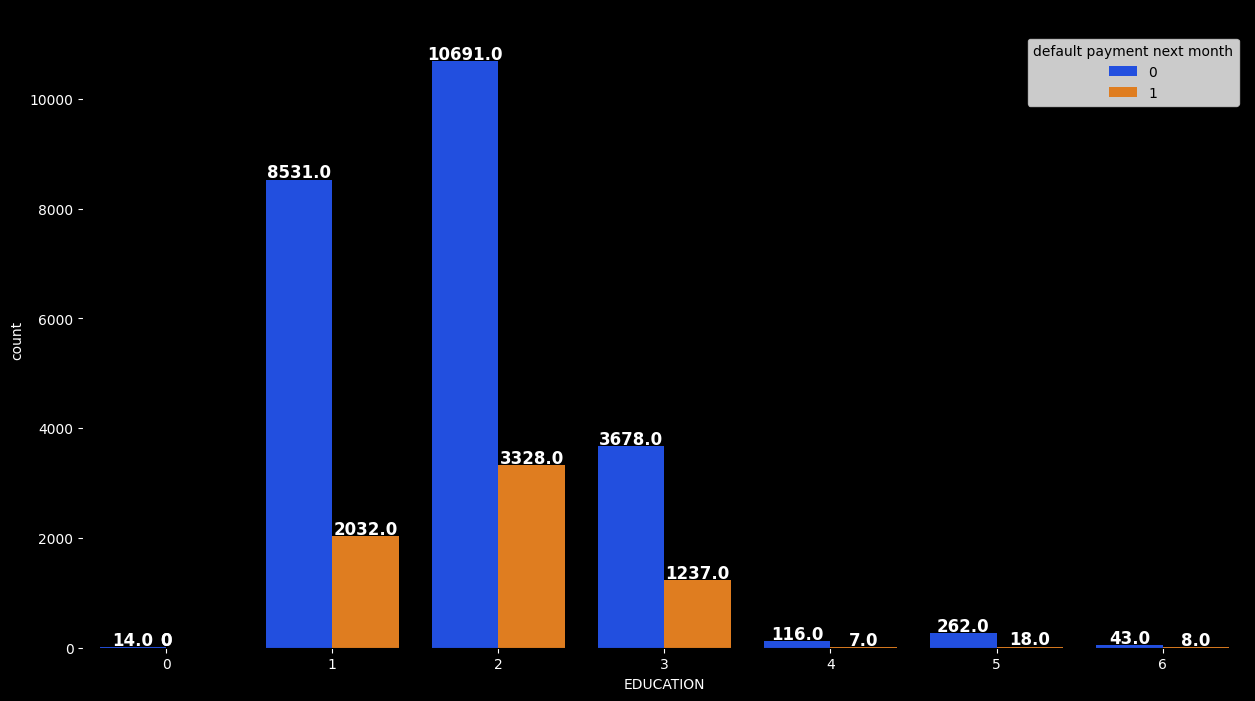

In [35]:
# Visualizing above data
fig, ax = plt.subplots(figsize = (15, 8), facecolor = 'black')
plt.title("Relationship between education and target variable")
sns.countplot(data =df, hue = 'default payment next month', x = 'EDUCATION', palette='bright')
ax.set_facecolor('black')
ax.tick_params(axis = 'x', colors = 'white')
ax.tick_params(axis = 'y', colors = 'white')
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')

for p in ax.patches:
    ax.annotate(
        format(p.get_height()),
        (p.get_x() + p.get_width()/2., p.get_height()),
        ha = 'center', va='center',
        xytext = (0, 5),
        textcoords = 'offset points',
        fontsize = 12, color = 'white', weight = 'bold'
    )

In [36]:
# Observations 12:
# Surprisingly, people with no formal education did not do any defaults in their credit card payment
# Also in all the categories of education, people who are not defaulters is greater than people who are defaulters. 

In [37]:
# Relationship between marriage and target variable
df.groupby('MARRIAGE')['default payment next month'].value_counts(normalize=True).to_frame()*100


proportion
MARRIAGE default payment next month            
0        0                            90.740741
         1                             9.259259
1        0                            76.537418
         1                            23.462582
2        0                            79.052995
         1                            20.947005
3        0                            73.993808
         1                            26.006192

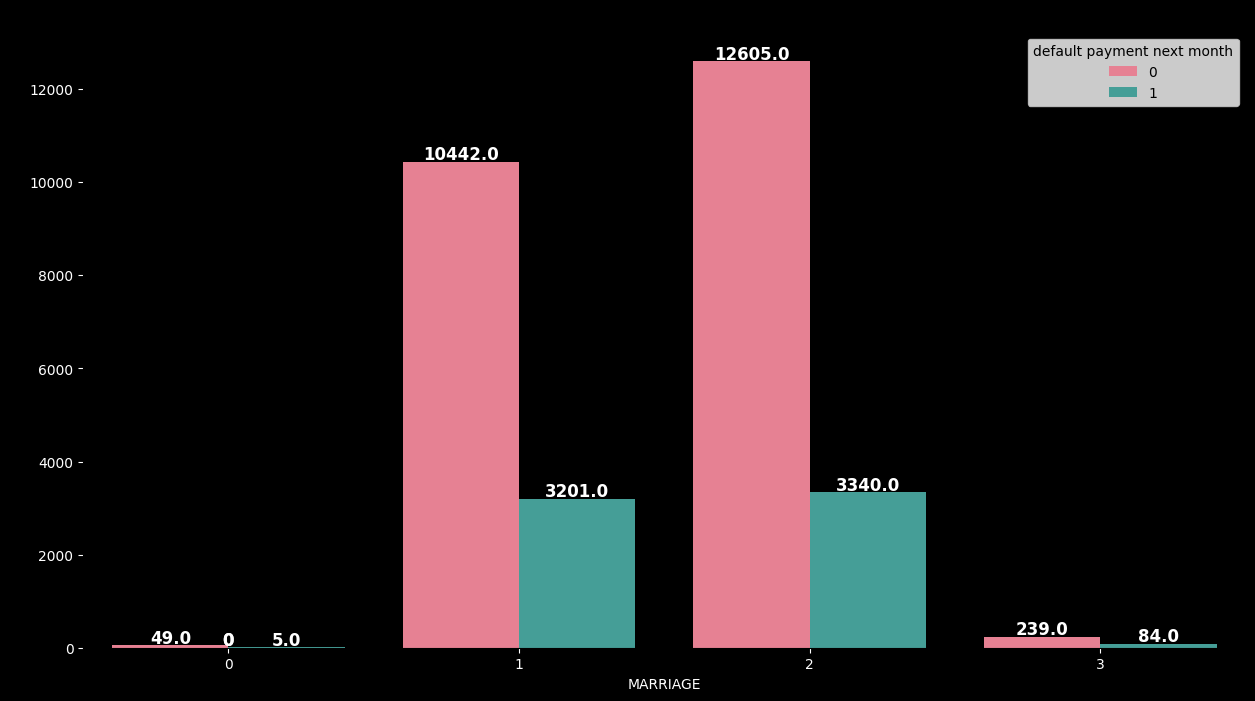

In [38]:
# visualizing above data
fig, ax = plt.subplots(figsize=(15,8), facecolor = 'black')
plt.title("Relationship between marriage and target variable")
sns.countplot(data =df, hue = 'default payment next month', x = 'MARRIAGE', palette='husl')
ax.set_facecolor('black')
ax.tick_params(axis = 'x', colors = 'white')
ax.tick_params(axis = 'y', colors = 'white')
ax.xaxis.label.set_color('white')
ax.xaxis.label.set_color('white')

for p in ax.patches:
    ax.annotate(
        format(p.get_height()),
        (p.get_x() + p.get_width()/2., p.get_height()),
        ha = 'center', va= 'center',
        xytext = (0,5),
        textcoords = 'offset points',
        fontsize = 12, color = 'white', weight = 'bold'
    )

In [39]:
# Observations 12:
# Unmarried people are less likely to be defaulters as compared to married people.

In [40]:
# Plotting pairplot
# sns.pairplot(df)

<Axes: >

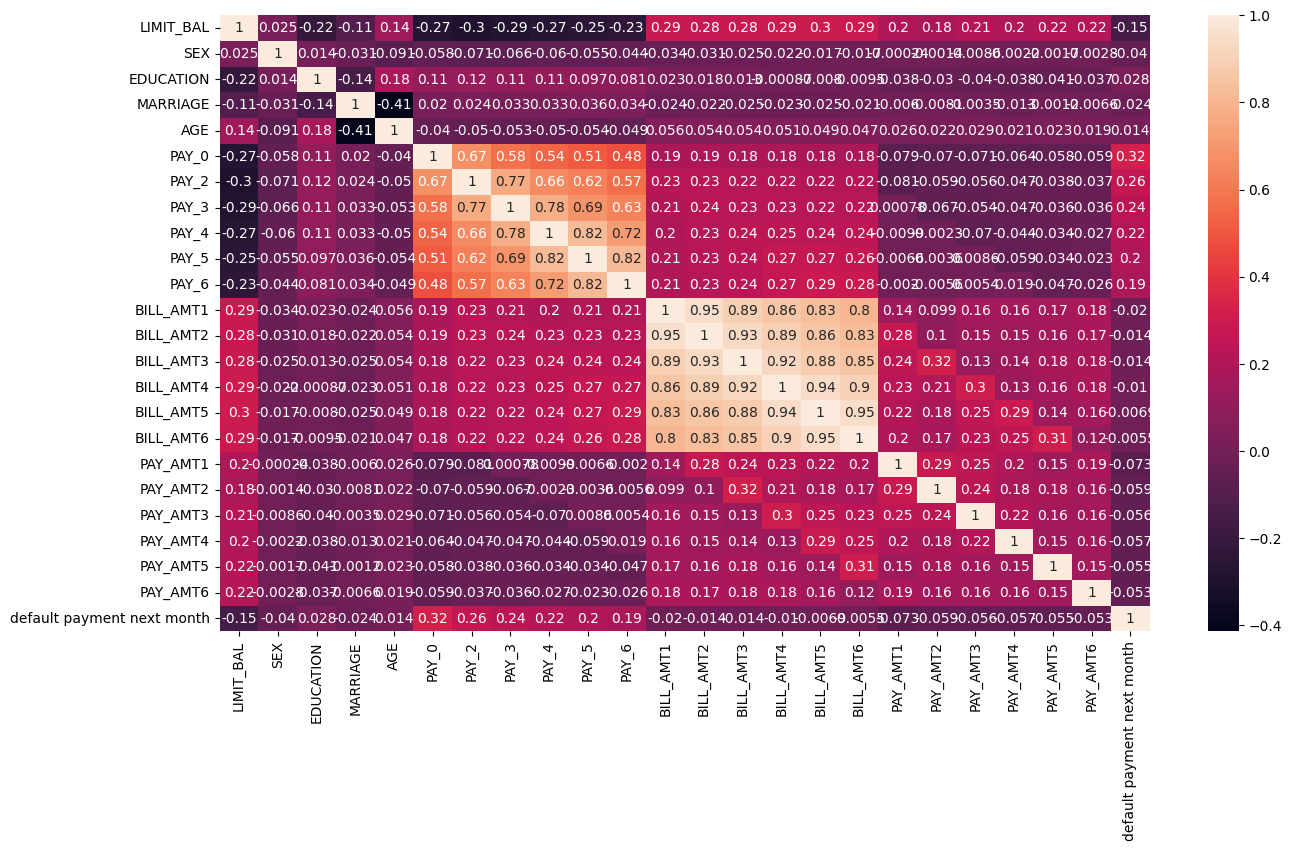

In [41]:
# Observations 13:
# From the above pairplot we can see that there is some relationship between the feature columns. We will not plot a heatmap to better understand this correlation
plt.figure(figsize= (15, 8))
sns.heatmap(df.corr(), annot = True)

In [42]:
# Observations 14:
# There are some relationships between the feature columns that are not entirely independed. For example, there is a correlation between a customer who was not avle to pay the bill for 1 month was again not able to pay the bill for subsequent months and hence the correlation. 
# Similarly for the Bill Amount column, the same as happened. If the customer was not able to pay the bill, then the amount almost remained the sae or if the customer was able to pay the bill then the amount was reduced. 
# We usually remove the columns when they convey the same information. But here, dropping the columns shall result in loss of bill and payment history data. So we don't need to drop any column although a correlation exists.

In [43]:
# Separating the dependent and independent features
X = df.drop('default payment next month', axis = 1)
y = df['default payment next month']

In [44]:
X.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [45]:
y.head()

0    1
1    1
2    0
3    0
4    0
Name: default payment next month, dtype: int64

### Experiment 1

In [46]:
# We do not need to handle missing values as none exist
# We first need to scale the data so that all the columns are in same scale
# As the data contains a lot of outliers therefore we will use Robust Scaler
from sklearn.preprocessing import RobustScaler
robust_scaler = RobustScaler()

X_Scaled = robust_scaler.fit_transform(X)

# Handling Imbalanced data
from imblearn.combine import SMOTETomek

# Resampling the minority class. 
smt = SMOTETomek(random_state=42, sampling_strategy='minority', n_jobs = -1)
X_balanced, y_balanced = smt.fit_resample(X_Scaled, y)

c:\Users\RadhikaMaheshwari\ - \Desktop\Test\2025\end to end ml\ml_credit_card_defaulter\venv\lib\site-packages\imblearn\over_sampling\_smote\base.py:370: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


In [47]:
# Initialize default model dictionary
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

models = {
    "Random Forest": RandomForestClassifier(),
    "Gradient Boost Classifier": GradientBoostingClassifier(),
    "Ada Boost Classifier": AdaBoostClassifier(),
    "Logistic Regression": LogisticRegression(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "K Nearest Neighbours Classifier": KNeighborsClassifier(),
    "XGBoost Classifier": XGBClassifier()
}

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_auc_score
from sklearn.model_selection import RandomizedSearchCV
def evaluate_clf(true, predicted):
    """
        This function takes true values and predicted values
        Returns accuracy score, f1 score, precision, recall, roc auc score
    """
    accuracy = accuracy_score(true, predicted)
    f1 = f1_score(true, predicted)
    precision = precision_score(true, predicted)
    recall = recall_score(true, predicted)
    roc_auc_score_ = roc_auc_score(true, predicted)
    return accuracy, f1, precision, recall, roc_auc_score_

def evaluate_models(X, y, models, params):
    """
        This function takes X and y and models dictionary as input
        It splits the data into train and test set
        Iterates through the given model dictionary and evaluates metrics
        Returns a dataframe which contains report of all model metrics with cost
    """
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    cost_list = []
    models_list = []
    accuracy_list = []

    for i in range(len(list(models))):
        model = list(models.values())[i]
        param = params[list(models.keys())[i]]

        rs = RandomizedSearchCV(model, param, cv = 3)
        rs.fit(X_train, y_train)

        model.set_params(**rs.best_params_)
        

        model.fit(X_train, y_train)

        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        model_train_accuracy, model_train_f1, model_train_precision, model_train_recall, model_train_roc_auc_score = evaluate_clf(y_train, y_train_pred)

        model_test_accuracy, model_test_f1, model_test_precision, model_test_recall, model_test_roc_auc_score = evaluate_clf(y_test, y_test_pred)

        print(list(models.keys())[i])
        models_list.append(list(models.keys())[i])

        print("Model performance for training data")
        print("- Accuracy: {:.4f}".format(model_train_accuracy))
        print("- F1 Score: {:.4f}".format(model_train_f1))
        print("- Precision: {:.4f}".format(model_train_precision))
        print("- Recall: {:.4f}".format(model_train_recall))
        print("- Roc Auc Score: {:.4f}".format(model_train_roc_auc_score))

        print("-------------------------------------------------------------------------------")

        print("Model performance for test data")
        print("- Accuracy: {:.4f}".format(model_test_accuracy))
        print("-F1 Score: {:.4f}".format(model_test_f1))
        print("- Precision: {:.4f}".format(model_test_precision))
        print("- Recall:{:.4f}".format(model_train_recall))
        print("- Roc Auc Score: {:.4f}".format(model_test_roc_auc_score))

        print("="*35)
        print("/n")

                  

In [49]:
# 
# There are three algorithms that are performing well - Random Forest, Gradient Boost and XG Boost.
# Let us perform hyper parameter tuning to get the best model

In [50]:
params = {
    "Decision Tree Classifier": {
        'criterion': ['gini', 'entropy', 'log_loss'],
        #'splitter': ['best', 'random'],
        'max_depth': [1, 3, 5, 7, 10],
        #'min_samples_split': [1, 2, 3, 5, 7, 10, 15, 20, 30]
    },
    "Random Forest": {
        'criterion': ["gini", "entropy", "log_loss"],
        #'max_depth': [1, 3, 5, 7],
        'min_samples_split': [2, 3, 5, 7]
    },
    'Gradient Boost Classifier': {
        #'loss': ["log_loss", "exponential"],
        'learning_rate': [0.1, 0.001, 0.0001],
        #'n_estimators': [100, 150],
        'criterion': ["friedman_mse", "squared_error"]
    },
    "Ada Boost Classifier":{
        'n_estimators': [100, 200, 300, 150, 120],
        'learning_rate': [0.1, 0.001, 0.0001]
    },
    "K Nearest Neighbours Classifier":{
        "n_neighbors": [5, 7, 9, 10],
        #"weights": ["uniform", "distance"],
        "algorithm": ["ball_tree", "kd_tree"]
    },
    "XGBoost Classifier": {
        'loss': ["log_loss", "exponential"],
        #'learning_rate': [0.1, 0.001, 0.0001],
        #'n_estimators': [100, 150],
        'criterion': ["friedman_mse", "squared_error"]
    },
    "Logistic Regression":{}
}

In [51]:
evaluate_models(X_balanced, y_balanced, models, params)    

Random Forest
Model performance for training data
- Accuracy: 0.9996
- F1 Score: 0.9996
- Precision: 0.9995
- Recall: 0.9997
- Roc Auc Score: 0.9996
-------------------------------------------------------------------------------
Model performance for test data
- Accuracy: 0.8772
-F1 Score: 0.8754
- Precision: 0.8867
- Recall:0.9997
- Roc Auc Score: 0.8772
/n


c:\Users\RadhikaMaheshwari\ - \Desktop\Test\2025\end to end ml\ml_credit_card_defaulter\venv\lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Gradient Boost Classifier
Model performance for training data
- Accuracy: 0.8280
- F1 Score: 0.8153
- Precision: 0.8806
- Recall: 0.7591
- Roc Auc Score: 0.8280
-------------------------------------------------------------------------------
Model performance for test data
- Accuracy: 0.8260
-F1 Score: 0.8143
- Precision: 0.8712
- Recall:0.7591
- Roc Auc Score: 0.8259
/n
Ada Boost Classifier
Model performance for training data
- Accuracy: 0.7639
- F1 Score: 0.7368
- Precision: 0.8330
- Recall: 0.6605
- Roc Auc Score: 0.7639
-------------------------------------------------------------------------------
Model performance for test data
- Accuracy: 0.7628
-F1 Score: 0.7363
- Precision: 0.8266
- Recall:0.6605
- Roc Auc Score: 0.7626
/n


KeyError: 'Logistic Regression'

In [54]:
# Random Forest, XG boost and Gradient Boost are performing well so we will only use these three models in the production 
 
params = {
    "Random Forest": {
        'criterion': ["gini", "entropy", "log_loss"],
        'max_depth': [1, 3, 5, 7],
        'min_samples_split': [2, 3, 5, 7]
    },
    'Gradient Boost Classifier': {
        'loss': ["log_loss", "exponential"],
        'learning_rate': [0.1, 0.001, 0.0001],
        'n_estimators': [100, 150],
        'criterion': ["friedman_mse", "squared_error"]
    },
    "XGBoost Classifier": {
        'loss': ["log_loss", "exponential"],
        'learning_rate': [0.1, 0.001, 0.0001],
        'n_estimators': [100, 150],
        'criterion': ["friedman_mse", "squared_error"]
    }
}

models = {
    "Random Forest": RandomForestClassifier(),
    "Gradient Boost Classifier": GradientBoostingClassifier(),
    "XGBoost Classifier": XGBClassifier()
}

In [55]:
evaluate_models(X_balanced, y_balanced, models, params)    

Random Forest
Model performance for training data
- Accuracy: 0.7617
- F1 Score: 0.7404
- Precision: 0.8137
- Recall: 0.6792
- Roc Auc Score: 0.7618
-------------------------------------------------------------------------------
Model performance for test data
- Accuracy: 0.7532
-F1 Score: 0.7323
- Precision: 0.7981
- Recall:0.6792
- Roc Auc Score: 0.7530
/n
Gradient Boost Classifier
Model performance for training data
- Accuracy: 0.8438
- F1 Score: 0.8338
- Precision: 0.8916
- Recall: 0.7830
- Roc Auc Score: 0.8439
-------------------------------------------------------------------------------
Model performance for test data
- Accuracy: 0.8404
-F1 Score: 0.8304
- Precision: 0.8840
- Recall:0.7830
- Roc Auc Score: 0.8403
/n


c:\Users\RadhikaMaheshwari\ - \Desktop\Test\2025\end to end ml\ml_credit_card_defaulter\venv\lib\site-packages\xgboost\core.py:158: UserWarning: [12:50:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "criterion", "loss" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\RadhikaMaheshwari\ - \Desktop\Test\2025\end to end ml\ml_credit_card_defaulter\venv\lib\site-packages\xgboost\core.py:158: UserWarning: [12:50:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "criterion", "loss" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\RadhikaMaheshwari\ - \Desktop\Test\2025\end to end ml\ml_credit_card_defaulter\venv\lib\site-packages\xgboost\core.py:158: UserWarning: [12:50:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-g

XGBoost Classifier
Model performance for training data
- Accuracy: 0.8856
- F1 Score: 0.8797
- Precision: 0.9278
- Recall: 0.8364
- Roc Auc Score: 0.8856
-------------------------------------------------------------------------------
Model performance for test data
- Accuracy: 0.8646
-F1 Score: 0.8570
- Precision: 0.9053
- Recall:0.8364
- Roc Auc Score: 0.8645
/n
